In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
data = pd.read_csv('us_presidents.csv')
data.head()

,Unnamed: 0,S.No.,start,end,president,prior,party,vice
0,0,1,"April 30, 1789","March 4, 1797",George Washington,Commander-in-Chief of the Continental Army ...,Nonpartisan [13],John Adams
1,1,2,"March 4, 1797","March 4, 1801",John Adams,1st Vice President of the United States,Federalist,Thomas Jefferson
2,2,3,"March 4, 1801","March 4, 1809",Thomas Jefferson,2nd Vice President of the United States,Democratic- Republican,Aaron Burr
3,3,4,"March 4, 1809","March 4, 1817",James Madison,5th United States Secretary of State (1801–...,Democratic- Republican,George Clinton
4,4,5,"March 4, 1817","March 4, 1825",James Monroe,7th United States Secretary of State (1811–...,Democratic- Republican,Daniel D. Tompkins


In [91]:
data.shape

(45, 8)

In [92]:
data.columns

Index(['Unnamed: 0', 'S.No.', 'start', 'end', 'president', 'prior', 'party',
       'vice'],
      dtype='object')

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  45 non-null     int64 
 1   S.No.       45 non-null     int64 
 2   start       45 non-null     object
 3   end         44 non-null     object
 4   president   45 non-null     object
 5   prior       45 non-null     object
 6   party       45 non-null     object
 7   vice        45 non-null     object
dtypes: int64(2), object(6)
memory usage: 2.9+ KB


In [94]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [95]:
data.head()

,S.No.,start,end,president,prior,party,vice
0,1,"April 30, 1789","March 4, 1797",George Washington,Commander-in-Chief of the Continental Army ...,Nonpartisan [13],John Adams
1,2,"March 4, 1797","March 4, 1801",John Adams,1st Vice President of the United States,Federalist,Thomas Jefferson
2,3,"March 4, 1801","March 4, 1809",Thomas Jefferson,2nd Vice President of the United States,Democratic- Republican,Aaron Burr
3,4,"March 4, 1809","March 4, 1817",James Madison,5th United States Secretary of State (1801–...,Democratic- Republican,George Clinton
4,5,"March 4, 1817","March 4, 1825",James Monroe,7th United States Secretary of State (1811–...,Democratic- Republican,Daniel D. Tompkins


In [96]:
data.drop(data.index[43],inplace=True)

In [97]:
data.head()

,S.No.,start,end,president,prior,party,vice
0,1,"April 30, 1789","March 4, 1797",George Washington,Commander-in-Chief of the Continental Army ...,Nonpartisan [13],John Adams
1,2,"March 4, 1797","March 4, 1801",John Adams,1st Vice President of the United States,Federalist,Thomas Jefferson
2,3,"March 4, 1801","March 4, 1809",Thomas Jefferson,2nd Vice President of the United States,Democratic- Republican,Aaron Burr
3,4,"March 4, 1809","March 4, 1817",James Madison,5th United States Secretary of State (1801–...,Democratic- Republican,George Clinton
4,5,"March 4, 1817","March 4, 1825",James Monroe,7th United States Secretary of State (1811–...,Democratic- Republican,Daniel D. Tompkins


In [98]:
df = data.groupby(['president','start','end']).size().reset_index()

In [99]:
df.drop(df.index[7],inplace=True)

In [100]:
df.reset_index()
df['endyear'] = pd.to_datetime(df['end'])

In [101]:
df['startyear'] = pd.to_datetime(df['start'])

In [102]:
df.drop(['start','end'],axis=1,inplace=True)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 43
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   president  43 non-null     object        
 1   0          43 non-null     int64         
 2   endyear    43 non-null     datetime64[ns]
 3   startyear  43 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 1.7+ KB


In [104]:
df['start']= df['startyear'].dt.year

In [105]:
df['end'] = df['endyear'].dt.year

In [106]:
df.head()

,president,0,endyear,startyear,start,end
0,Abraham Lincoln,1,1865-04-15,1861-03-04,1861,1865
1,Andrew Jackson,1,1837-03-04,1829-03-04,1829,1837
2,Andrew Johnson,1,1869-03-04,1865-04-15,1865,1869
3,Benjamin Harrison,1,1893-03-04,1889-03-04,1889,1893
4,Bill Clinton,1,2001-01-20,1993-01-20,1993,2001


In [107]:
df.drop(['endyear','startyear'],axis=1,inplace=True)

In [108]:
df.head()

,president,0,start,end
0,Abraham Lincoln,1,1861,1865
1,Andrew Jackson,1,1829,1837
2,Andrew Johnson,1,1865,1869
3,Benjamin Harrison,1,1889,1893
4,Bill Clinton,1,1993,2001


In [109]:
df.drop(0,axis=1,inplace=True)

In [110]:
df['No_of_year_as_president'] = df['end']-df['start']

In [111]:
df1 = df.sort_values(by='No_of_year_as_president',ascending=False).reset_index()

In [130]:
df1

,index,president,start,end,No_of_year_as_president
0,22,James Madison,1809,1817,8
1,37,Ulysses S. Grant,1869,1877,8
2,23,James Monroe,1817,1825,8
3,1,Andrew Jackson,1829,1837,8
4,17,Harry S. Truman,1945,1953,8
5,33,Ronald Reagan,1981,1989,8
6,35,Theodore Roosevelt,1901,1909,8
7,12,George W. Bush,2001,2009,8
8,36,Thomas Jefferson,1801,1809,8
9,13,George Washington,1789,1797,8


In [132]:
df1['No_of_year_as_president'].value_counts()

4    19
8    14
6     2
3     2
2     2
0     2
5     1
1     1
Name: No_of_year_as_president, dtype: int64

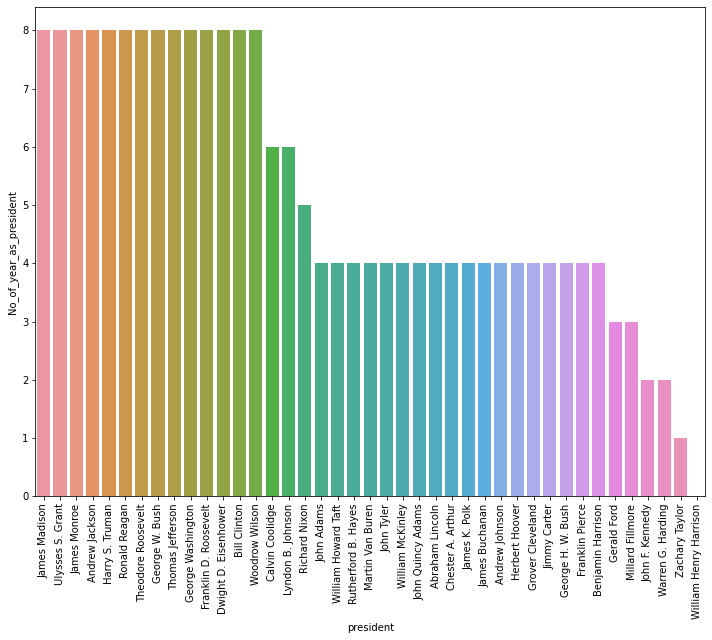

In [129]:
plt.rcParams['figure.figsize'] = (12,9)
sns.barplot(x=df1['president'][:-1],y=df1['No_of_year_as_president'][:-1],data=df1)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='president', ylabel='No_of_year_as_president'>

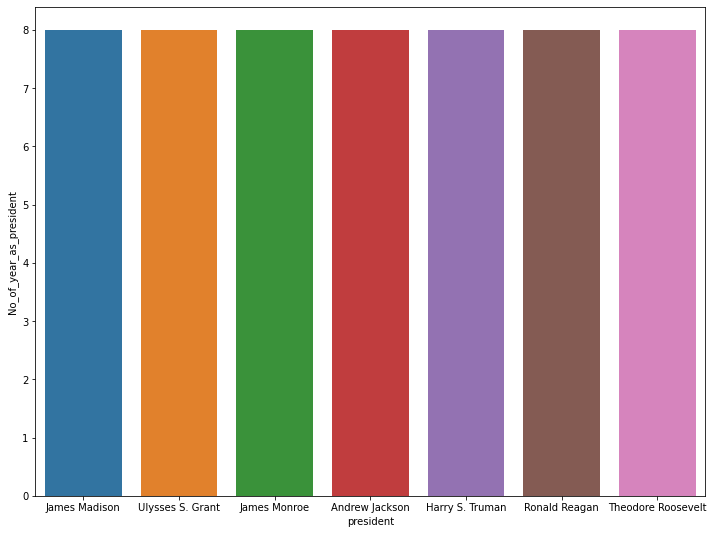

In [121]:
##Plotting by presidents and no of year as president
plt.rcParams['figure.figsize'] = (12,9)
sns.barplot(x=df1['president'][:7],y=df1['No_of_year_as_president'][:7],data=df1)

- These are the presidents who have been president for 8 year
- The majority of the presidents where in there position for 4 years
- The least period of time as a president where James A. Garfield ,William Henry Harrison ,Zachary Taylor